# Experiência de Millikan

$m= \rho \frac{4}{3} \pi  R^3 $    
$F_a= - k \eta v$   
$   \frac{d v}{dt} =  g -  \frac{k \eta}{m} v$

Solução Analítica   $v(t)= \frac{m g}{k \eta} (1 - e^{-( k \eta/m) t}  ) = v_L (1 - e^{-t/\tau})$   
$\tau= k \eta / m  $ ,  $v_L= \frac{m g}{k \eta}  $

In [23]:
%matplotlib notebook
from __future__ import print_function
import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy import constants # Constantes Físicas
from scipy.integrate import odeint
import ipywidgets as widgets

SyntaxError: from __future__ imports must occur at the beginning of the file (cell_name, line 5)

In [2]:
#Raio da gota
R=9e-7
k=6*np.pi*R
#18,52 · 10−6 Pa·s (viscosidade do ar a 23 ◦C)
n=18.52e-6
#Distância entre placas
d=5e-3
#massa da gota
m=4.0/3.0*np.pi*R**3*973
g=9.8
ro=973
tau=m/k /n
tau

9.456803455723542e-06

## Solução do movimento por integração numérica da equação diferencial

In [3]:
def Queda(y, t, b, c):
    z, vz = y
    dydt = [vz, b + c * vz]
    return dydt

In [4]:
#condições iniciais (z_0,vz_0)
y0 = [0.0, 0.0]
t = np.linspace(0, 1e-4, 101)
sol = odeint(Queda, y0, t, args=(-g, -k *n / m))

<IPython.core.display.Javascript object>


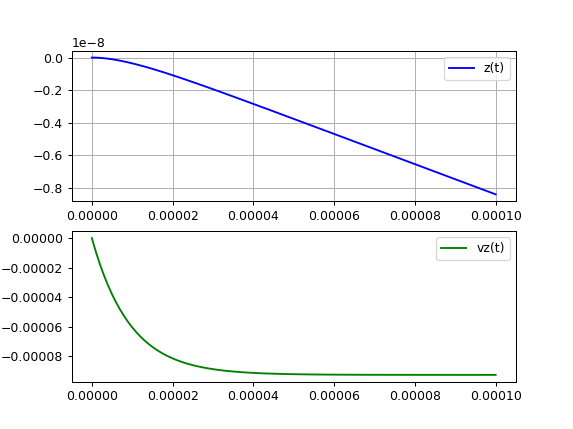

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(211) #, autoscale_on=False, xlim=(0, 10), ylim=(-1, 1))
ax2 = fig.add_subplot(212) #, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))

#ax1.plot(theta, y,label='Emitido-CH1')
ax1.plot(t, sol[:, 0], 'b', label='z(t)')
ax1.grid()
ax2.plot(t, sol[:, 1], 'g', label='vz(t)')
ax1.legend(loc='best')
ax2.legend(loc='best')
#ax1.xlabel('t')
fig.show()

# Cálculo da Carga da gota

$ v_L = \frac{2 R^2 (\rho_{oleo} - \rho_{ar}) g} {9 \eta_{ar}} $   

$ R = \sqrt{ \frac{9 v_L \eta_{ar}}{2  (\rho_{oleo} - \rho_{ar}) g}  }$   
$q=\frac{6 \pi R \eta_{ar} d v_L }{U}$

In [6]:
##Medidas Experimentais
###Tempo 
T=34.095
###Distância percorida
D=5*0.5e-3
U=335.0

In [8]:
vL=D/T
R=np.sqrt(9 * vL * n / (2*g*(ro)))
print("Velocide Limite: %g m/s" % vL)
print("Raio da Gota: %g m" % R)

Velocide Limite: 7.33245e-05 m/s
Raio da Gota: 8.00538e-07 m


In [17]:
q=(6*np.pi*R*n*d*vL)/U
print("Carga da Gota: %g C" % q)
Rexp=0.803e-6; vLexp = 7.374e-5; Uexp=(335+341+340)/3.0
qexp=(6*np.pi*Rexp*n*d*vLexp)/Uexp
print("Carga da Gota (exp): %g C" % qexp)

Carga da Gota: 3.05843e-19 C
Carga da Gota (exp): 3.05182e-19 C


In [10]:
print("Carga do Electrao tabelada: %g C" %constants.e)

Carga do Electrao tabelada: 1.60218e-19 C


## Correção Lei de Stokes

In [18]:
b =7.88e-3
#Pressão atmosferica em Pascal
p=101325 

In [20]:
qp=qexp*(1.0/(1.0 + b/(p*R)))**(3.0/2.0)
print("Carga da Gota corrigida: %g C" % q)

Carga da Gota corrigida: 3.05843e-19 C


In [21]:
x = np.arange(-5, 5, 1.)
msize=100.0*np.random.rand(len(x))
y=np.ones(len(x))

fig = plt.figure()
ax1 = fig.add_subplot(211) #, autoscale_on=False, xlim=(0, 10), ylim=(-1, 1))

#ax1.plot(theta, y,label='Emitido-CH1')
ax1.scatter(x, y, marker='o', facecolors='none', edgecolors='r', s=msize, label='the data')
#ax1.plot(x,y, 'b*', markersize=xsize, label='z(t)')
#plt.plot(x,y)
fig.show()

<IPython.core.display.Javascript object>


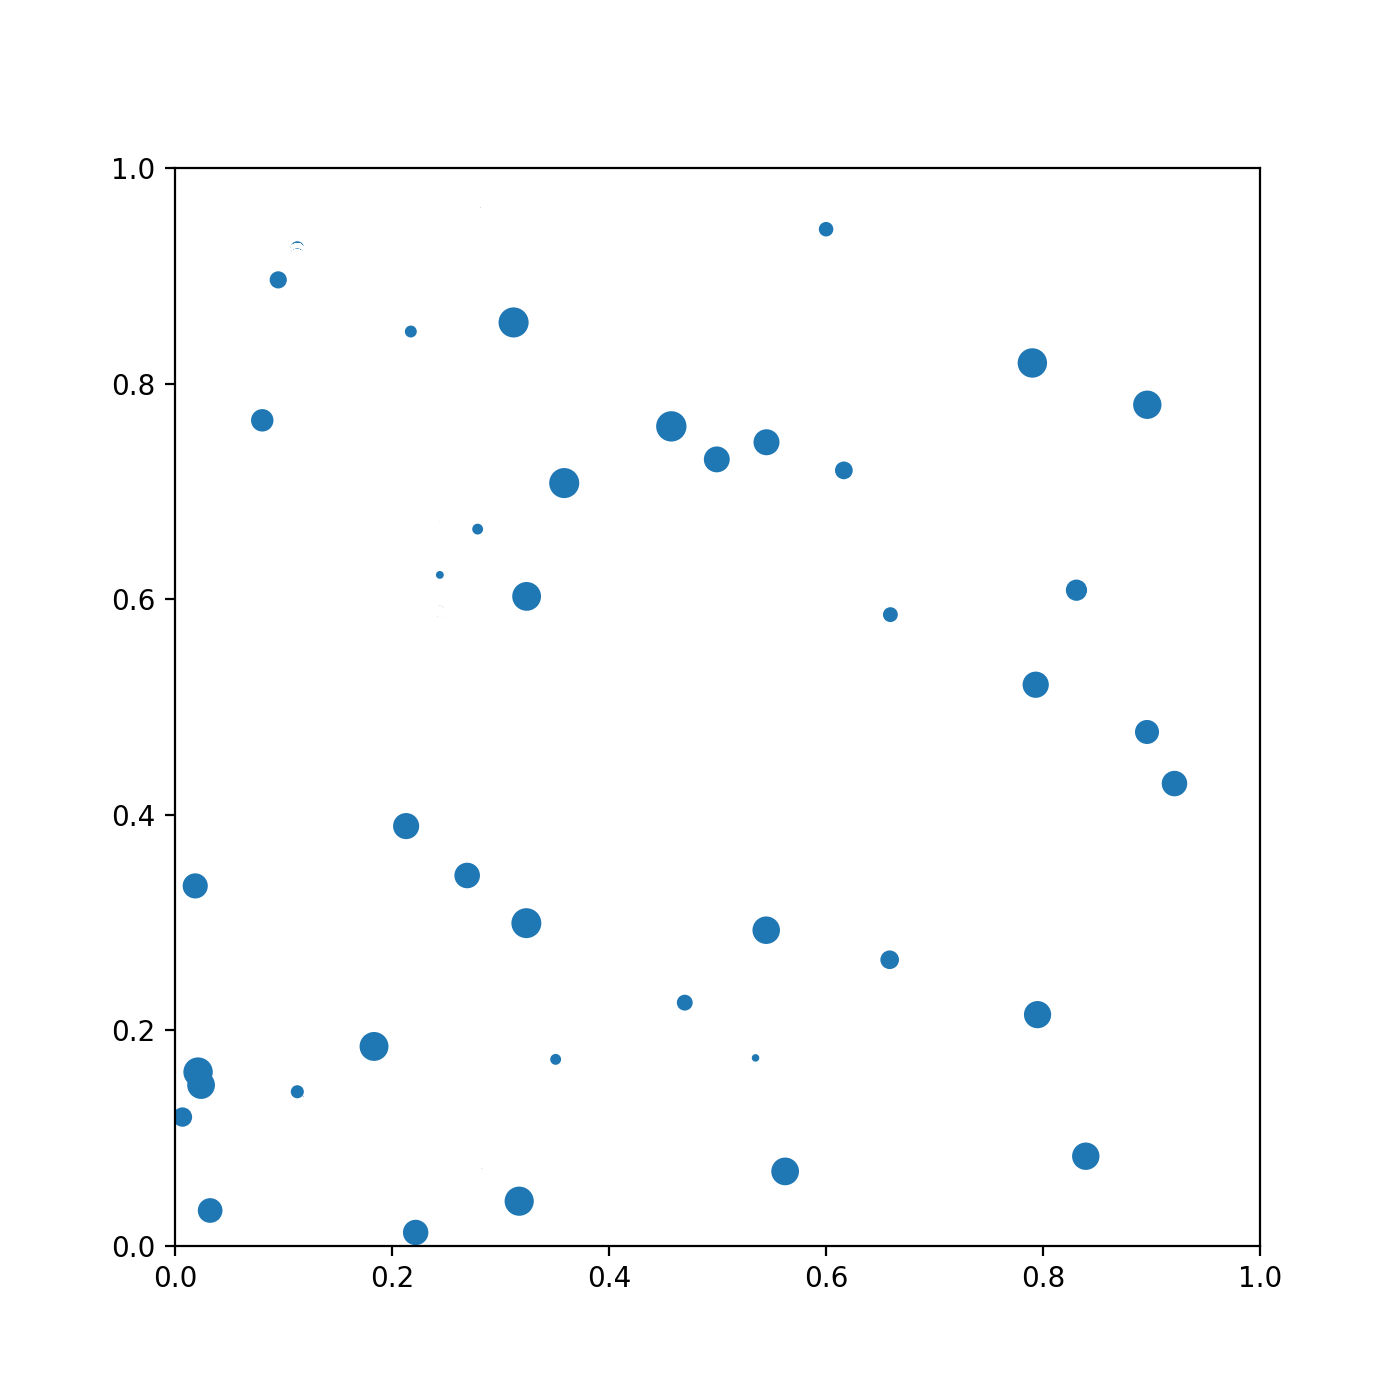

In [22]:
#https://stackoverflow.com/questions/32268532/animate-a-scatterplot-with-pyplot
from matplotlib.animation import FuncAnimation
dt = 0.05
n=40
L = 1
particles=np.zeros(n,dtype=[("position", float , 2),
                            ("velocity", float ,2),
                            ("force", float ,2),
                            ("size", float , 1)])

particles["position"]=np.ones((n,2)); #np.random.uniform(0,L,(n,2));
particles["position"][:,0]=np.random.uniform(0,L,n);
particles["size"]= np.random.uniform(0,100,n) #;20*np.ones(n);
particles["velocity"]=np.zeros((n,2));
particles["velocity"][:,1]=-(particles["size"]/100.0)**2
#particles["force"]=np.random.uniform(-2,2.,(n,2));
particles["force"]=np.zeros((n,2))
#particles["force"][:,1]=-particles["size"]/100.0

fig = plt.figure(figsize=(7,7))
ax = plt.axes(xlim=(0,L),ylim=(0,L))
scatter=ax.scatter(particles["position"][:,0], particles["position"][:,1], s=particles["size"])

def update(frame_number):
#    particles["velocity"] = particles["velocity"] + particles["force"]*dt
    particles["position"] = particles["position"] + particles["velocity"]*dt

    particles["position"] = particles["position"]%L
    scatter.set_offsets(particles["position"])
    return scatter, 

anim = FuncAnimation(fig, update)#, interval=10)
FuncAnimation
#anim.save('Millikan.mp4', fps=10)
plt.show() 